# Ejercicio 3 (Prueba de algoritmos)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Cargar el dataset completo
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Seleccionar solo las primeras 1000 imágenes y etiquetas
X_train_small = X_train[:10000]
y_train_small = y_train[:10000]

X_test_small = X_test[:2000]   # También podés reducir el test si querés
y_test_small = y_test[:2000]

print("Shape del set de entrenamiento:", X_train_small.shape)
print("Shape del set de prueba:", X_test_small.shape)

Shape del set de entrenamiento: (10000, 28, 28)
Shape del set de prueba: (2000, 28, 28)


### Preprocesamiento

In [2]:
# Aplanar las imágenes de 28x28 a 784 características (1D)
X_train_flattened = X_train_small.reshape(X_train_small.shape[0], -1)
X_test_flattened = X_test_small.reshape(X_test_small.shape[0], -1)

print("Shape del set de entrenamiento:", X_train_flattened.shape)
print("Shape del set de prueba:", X_test_flattened.shape)

# Escalar los valores de los píxeles entre 0 y 1
X_train_normalized = X_train_flattened / 255.0
X_test_normalized = X_test_flattened / 255.0

from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=127)
X_train_binarized = binarizer.fit_transform(X_train_flattened)
X_test_binarized = binarizer.transform(X_test_flattened)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_flattened)
X_test_standardized = scaler.transform(X_test_flattened)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

Shape del set de entrenamiento: (10000, 784)
Shape del set de prueba: (2000, 784)


### Preprocesamiento: Datasets a probar

In [3]:
from sklearn.metrics import accuracy_score
import time

# Diccionario de datasets a probar (ya definidos previamente)
datasets = {
    "Raw (sin normalizar)": X_train_flattened,
    "Normalizado (/255)": X_train_normalized,
    "Binarizado": X_train_binarized,
    "Estandarizado (Z-score)": X_train_standardized,
    "Min-Max Scaling": X_train_scaled
}

test_sets = {
    "Raw (sin normalizar)": X_test_flattened,
    "Normalizado (/255)": X_test_normalized,
    "Binarizado": X_test_binarized,
    "Estandarizado (Z-score)": X_test_standardized,
    "Min-Max Scaling": X_test_scaled
}

## RandomForest

In [9]:
from sklearn.ensemble import RandomForestClassifier

total_accuracy = 0
total_train_time = 0
total_predict_time = 0
n = len(datasets)

# Evaluar cada tipo de preprocesamiento
for nombre, X_train_version in datasets.items():
    print(f"\n🌲 Evaluando con Random Forest: {nombre}")
    
    # Crear modelo
    model = RandomForestClassifier(n_estimators=150, random_state=42)
    
    # Entrenar
    start_train = time.time()
    model.fit(X_train_version, y_train_small)
    train_time = time.time() - start_train
    
    # Predecir
    X_test_version = test_sets[nombre]
    start_predict = time.time()
    y_pred = model.predict(X_test_version)
    predict_time = time.time() - start_predict

    # Calcular precisión
    acc = accuracy_score(y_test_small, y_pred)

    total_accuracy += acc
    total_train_time += train_time
    total_predict_time += predict_time

    # Resultados
    print(f"✅ Precisión: {acc * 100:.2f}%")
    print(f"🛠️ Tiempo de entrenamiento: {train_time:.2f} segundos")
    print(f"🔎 Tiempo de predicción: {predict_time:.2f} segundos")

# Promedios
avg_accuracy_RandomForest = (total_accuracy / n) * 100
avg_train_time_rf = total_train_time / n
avg_predict_time_rf = total_predict_time / n

print(f"\n📊 Promedio con Random Forest:")
print(f"🔢 Precisión promedio: {avg_accuracy_RandomForest:.2f}%")
print(f"🛠️ Tiempo promedio de entrenamiento: {avg_train_time:.2f} segundos")
print(f"🔎 Tiempo promedio de predicción: {avg_predict_time:.2f} segundos")


🌲 Evaluando con Random Forest: Raw (sin normalizar)
✅ Precisión: 93.35%
🛠️ Tiempo de entrenamiento: 7.75 segundos
🔎 Tiempo de predicción: 0.06 segundos

🌲 Evaluando con Random Forest: Normalizado (/255)
✅ Precisión: 93.35%
🛠️ Tiempo de entrenamiento: 7.87 segundos
🔎 Tiempo de predicción: 0.06 segundos

🌲 Evaluando con Random Forest: Binarizado
✅ Precisión: 92.30%
🛠️ Tiempo de entrenamiento: 3.69 segundos
🔎 Tiempo de predicción: 0.06 segundos

🌲 Evaluando con Random Forest: Estandarizado (Z-score)
✅ Precisión: 93.35%
🛠️ Tiempo de entrenamiento: 7.73 segundos
🔎 Tiempo de predicción: 0.06 segundos

🌲 Evaluando con Random Forest: Min-Max Scaling
✅ Precisión: 93.35%
🛠️ Tiempo de entrenamiento: 7.65 segundos
🔎 Tiempo de predicción: 0.06 segundos

📊 Promedio con Random Forest:
🔢 Precisión promedio: 93.14%
🛠️ Tiempo promedio de entrenamiento: 7.44 segundos
🔎 Tiempo promedio de predicción: 0.06 segundos


## Support Vector Machine (SVC)

In [5]:
from sklearn.svm import SVC

# Diccionarios para guardar resultados
avg_accuracy_svm = {}
avg_train_time_svm = {}
avg_predict_time_svm = {}

# Lista de kernels a probar
kernels = ['linear', 'rbf', 'poly']

# Evaluar cada kernel de SVM con todos los preprocesamientos
for kernel in kernels:
    print(f"\n==============================")
    print(f"🔍 Evaluando kernel: {kernel}")
    print(f"==============================")
    
    total_accuracy = 0
    total_train_time = 0
    total_predict_time = 0
    n = len(datasets)

    for nombre, X_train_version in datasets.items():
        X_test_version = test_sets[nombre]
        
        print(f"\n👉 Preprocesamiento: {nombre}")
        
        # Crear modelo
        model = SVC(kernel=kernel, random_state=42)
        
        # Tiempo de entrenamiento
        start_train = time.time()
        model.fit(X_train_version, y_train_small)
        train_time = time.time() - start_train
        
        # Tiempo de predicción
        start_predict = time.time()
        y_pred = model.predict(X_test_version)
        predict_time = time.time() - start_predict

        # Evaluar
        acc = accuracy_score(y_test_small, y_pred)
        
        total_accuracy += acc
        total_train_time += train_time
        total_predict_time += predict_time
        
        print(f"✅ Precisión: {acc * 100:.2f}%")
        print(f"🛠️ Tiempo de entrenamiento: {train_time:.2f} segundos")
        print(f"🔎 Tiempo de predicción: {predict_time:.2f} segundos")
    
    # Guardar resultados promedio para este kernel
    avg_accuracy = (total_accuracy / n) * 100
    avg_train = total_train_time / n
    avg_predict = total_predict_time / n

    avg_accuracy_svm[kernel] = avg_accuracy
    avg_train_time_svm[kernel] = avg_train
    avg_predict_time_svm[kernel] = avg_predict

    print(f"\n📊 Promedio para kernel '{kernel}':")
    print(f"🔢 Precisión promedio: {avg_accuracy:.2f}%")
    print(f"🛠️ Tiempo promedio de entrenamiento: {avg_train:.2f} segundos")
    print(f"🔎 Tiempo promedio de predicción: {avg_predict:.2f} segundos")


🔍 Evaluando kernel: linear

👉 Preprocesamiento: Raw (sin normalizar)
✅ Precisión: 89.55%
🛠️ Tiempo de entrenamiento: 5.81 segundos
🔎 Tiempo de predicción: 1.96 segundos

👉 Preprocesamiento: Normalizado (/255)
✅ Precisión: 89.75%
🛠️ Tiempo de entrenamiento: 5.62 segundos
🔎 Tiempo de predicción: 1.67 segundos

👉 Preprocesamiento: Binarizado
✅ Precisión: 86.65%
🛠️ Tiempo de entrenamiento: 6.32 segundos
🔎 Tiempo de predicción: 1.96 segundos

👉 Preprocesamiento: Estandarizado (Z-score)
✅ Precisión: 88.70%
🛠️ Tiempo de entrenamiento: 5.65 segundos
🔎 Tiempo de predicción: 1.81 segundos

👉 Preprocesamiento: Min-Max Scaling
✅ Precisión: 89.90%
🛠️ Tiempo de entrenamiento: 5.54 segundos
🔎 Tiempo de predicción: 1.63 segundos

📊 Promedio para kernel 'linear':
🔢 Precisión promedio: 88.91%
🛠️ Tiempo promedio de entrenamiento: 5.79 segundos
🔎 Tiempo promedio de predicción: 1.80 segundos

🔍 Evaluando kernel: rbf

👉 Preprocesamiento: Raw (sin normalizar)
✅ Precisión: 94.45%
🛠️ Tiempo de entrenamiento: 

## K-nearest neighbors (KNN)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializar variables para los promedios
total_accuracy_knn = 0
total_train_time_knn = 0
total_predict_time_knn = 0
n = len(datasets)

# Evaluar cada tipo de preprocesamiento
for nombre, X_train_version in datasets.items():
    print(f"\n👟 Evaluando con KNN: {nombre}")
    
    # Crear modelo KNN
    model_knn = KNeighborsClassifier(n_neighbors=5)
    
    # Tiempo de entrenamiento
    start_train = time.time()
    model_knn.fit(X_train_version, y_train_small)
    train_time = time.time() - start_train
    
    # Tiempo de predicción
    X_test_version = test_sets[nombre]
    start_predict = time.time()
    y_pred_knn = model_knn.predict(X_test_version)
    predict_time = time.time() - start_predict
    
    # Calcular precisión
    acc_knn = accuracy_score(y_test_small, y_pred_knn)

    total_accuracy_knn += acc_knn
    total_train_time_knn += train_time
    total_predict_time_knn += predict_time

    # Resultados
    print(f"✅ Precisión: {acc_knn * 100:.2f}%")
    print(f"🛠️ Tiempo de entrenamiento: {train_time:.2f} segundos")
    print(f"🔎 Tiempo de predicción: {predict_time:.2f} segundos")

# Promedios
avg_accuracy_knn = (total_accuracy_knn / n) * 100
avg_train_time_knn = total_train_time_knn / n
avg_predict_time_knn = total_predict_time_knn / n

print(f"\n📊 Promedio con KNN:")
print(f"🔢 Precisión promedio: {avg_accuracy_knn:.2f}%")
print(f"🛠️ Tiempo promedio de entrenamiento: {avg_train_time_knn:.2f} segundos")
print(f"🔎 Tiempo promedio de predicción: {avg_predict_time_knn:.2f} segundos")


👟 Evaluando con KNN: Raw (sin normalizar)
✅ Precisión: 92.05%
🛠️ Tiempo de entrenamiento: 0.00 segundos
🔎 Tiempo de predicción: 0.53 segundos

👟 Evaluando con KNN: Normalizado (/255)
✅ Precisión: 92.05%
🛠️ Tiempo de entrenamiento: 0.01 segundos
🔎 Tiempo de predicción: 1.74 segundos

👟 Evaluando con KNN: Binarizado
✅ Precisión: 90.15%
🛠️ Tiempo de entrenamiento: 0.00 segundos
🔎 Tiempo de predicción: 0.51 segundos

👟 Evaluando con KNN: Estandarizado (Z-score)
✅ Precisión: 88.65%
🛠️ Tiempo de entrenamiento: 0.01 segundos
🔎 Tiempo de predicción: 0.32 segundos

👟 Evaluando con KNN: Min-Max Scaling
✅ Precisión: 92.05%
🛠️ Tiempo de entrenamiento: 0.01 segundos
🔎 Tiempo de predicción: 0.31 segundos

📊 Promedio con KNN:
🔢 Precisión promedio: 90.99%
🛠️ Tiempo promedio de entrenamiento: 0.01 segundos
🔎 Tiempo promedio de predicción: 0.68 segundos


## Regresion logistica

In [7]:
from sklearn.linear_model import LogisticRegression

# Inicializar variables para los promedios
total_accuracy_logreg = 0
total_train_time_logreg = 0
total_predict_time_logreg = 0
n = len(datasets)

# Evaluar cada tipo de preprocesamiento
for nombre, X_train_version in datasets.items():
    print(f"\n📉 Evaluando con Regresión Logística: {nombre}")
    
    # Crear modelo
    model_logreg = LogisticRegression(max_iter=1000, random_state=42)
    
    # Tiempo de entrenamiento
    start_train = time.time()
    model_logreg.fit(X_train_version, y_train_small)
    train_time = time.time() - start_train

    # Tiempo de predicción
    X_test_version = test_sets[nombre]
    start_predict = time.time()
    y_pred_logreg = model_logreg.predict(X_test_version)
    predict_time = time.time() - start_predict

    # Calcular precisión
    acc_logreg = accuracy_score(y_test_small, y_pred_logreg)

    total_accuracy_logreg += acc_logreg
    total_train_time_logreg += train_time
    total_predict_time_logreg += predict_time

    # Resultados
    print(f"✅ Precisión: {acc_logreg * 100:.2f}%")
    print(f"🛠️ Tiempo de entrenamiento: {train_time:.2f} segundos")
    print(f"🔎 Tiempo de predicción: {predict_time:.2f} segundos")

# Promedios
avg_accuracy_logreg = (total_accuracy_logreg / n) * 100
avg_train_time_logreg = total_train_time_logreg / n
avg_predict_time_logreg = total_predict_time_logreg / n

print(f"\n📊 Promedio con Regresión Logística:")
print(f"🔢 Precisión promedio: {avg_accuracy_logreg:.2f}%")
print(f"🛠️ Tiempo promedio de entrenamiento: {avg_train_time_logreg:.2f} segundos")
print(f"🔎 Tiempo promedio de predicción: {avg_predict_time_logreg:.2f} segundos")


📉 Evaluando con Regresión Logística: Raw (sin normalizar)
✅ Precisión: 83.15%
🛠️ Tiempo de entrenamiento: 9.59 segundos
🔎 Tiempo de predicción: 0.00 segundos

📉 Evaluando con Regresión Logística: Normalizado (/255)
✅ Precisión: 87.00%
🛠️ Tiempo de entrenamiento: 2.38 segundos
🔎 Tiempo de predicción: 0.00 segundos

📉 Evaluando con Regresión Logística: Binarizado
✅ Precisión: 85.60%
🛠️ Tiempo de entrenamiento: 2.46 segundos
🔎 Tiempo de predicción: 0.00 segundos

📉 Evaluando con Regresión Logística: Estandarizado (Z-score)
✅ Precisión: 86.00%
🛠️ Tiempo de entrenamiento: 2.16 segundos
🔎 Tiempo de predicción: 0.00 segundos

📉 Evaluando con Regresión Logística: Min-Max Scaling
✅ Precisión: 87.05%
🛠️ Tiempo de entrenamiento: 2.79 segundos
🔎 Tiempo de predicción: 0.00 segundos

📊 Promedio con Regresión Logística:
🔢 Precisión promedio: 85.76%
🛠️ Tiempo promedio de entrenamiento: 3.87 segundos
🔎 Tiempo promedio de predicción: 0.00 segundos


### Cuadro comparativo

📊 Cuadro comparativo de modelos:

          Algoritmo  Precisión (%)  Tiempo de Entrenamiento (s)  Tiempo de Predicción (s)
      Random Forest          93.14                     6.938592                  0.060322
       SVM (Linear)          88.91                     5.788551                  1.804138
          SVM (RBF)          93.82                    10.883825                  4.646881
         SVM (Poly)          92.07                    15.455429                  2.546528
                KNN          90.99                     0.005081                  0.681813
Regresión Logística          85.76                     3.874411                  0.003530


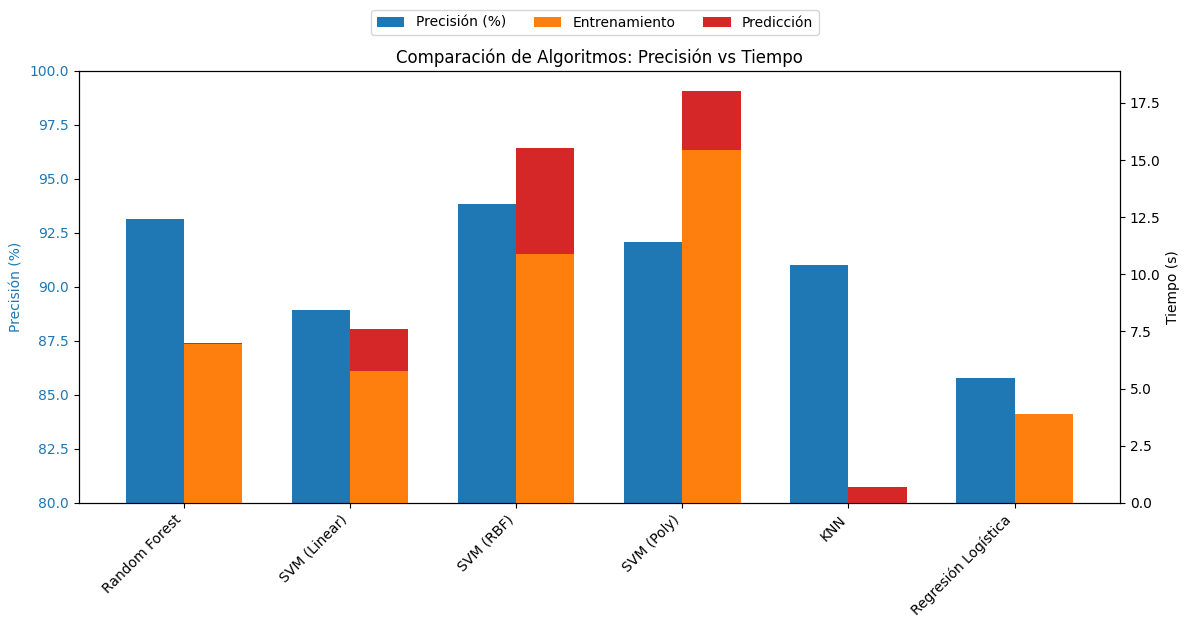

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos promedio (asegurate de tener estos valores definidos previamente)
data = {
    'Algoritmo': [
        'Random Forest',
        'SVM (Linear)',
        'SVM (RBF)',
        'SVM (Poly)',
        'KNN',
        'Regresión Logística'
    ],
    'Precisión (%)': [
        avg_accuracy_RandomForest,
        avg_accuracy_svm['linear'],
        avg_accuracy_svm['rbf'],
        avg_accuracy_svm['poly'],
        avg_accuracy_knn,
        avg_accuracy_logreg
    ],
    'Tiempo de Entrenamiento (s)': [
        avg_train_time_rf,
        avg_train_time_svm['linear'],
        avg_train_time_svm['rbf'],
        avg_train_time_svm['poly'],
        avg_train_time_knn,
        avg_train_time_logreg
    ],
    'Tiempo de Predicción (s)': [
        avg_predict_time_rf,
        avg_predict_time_svm['linear'],
        avg_predict_time_svm['rbf'],
        avg_predict_time_svm['poly'],
        avg_predict_time_knn,
        avg_predict_time_logreg
    ]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Mostrar tabla
print("📊 Cuadro comparativo de modelos:\n")
print(df.to_string(index=False))

# ------------------------------
# 📈 Gráfico de comparacion
# ------------------------------

fig, ax1 = plt.subplots(figsize=(12, 6))
x = range(len(df))
width = 0.35

# --- Barras de Precisión (eje izquierdo) ---
color_acc = 'tab:blue'
bars1 = ax1.bar([i - width/2 for i in x], df['Precisión (%)'], width=width, label='Precisión (%)', color=color_acc)
ax1.set_ylabel('Precisión (%)', color=color_acc)
ax1.tick_params(axis='y', labelcolor=color_acc)
ax1.set_ylim(80, 100)

# --- Barras apiladas de Tiempo (eje derecho) ---
ax2 = ax1.twinx()
color_train = 'tab:orange'
color_pred = 'tab:red'
bars_train = ax2.bar([i + width/2 for i in x], df['Tiempo de Entrenamiento (s)'], width=width, label='Entrenamiento', color=color_train)
bars_pred = ax2.bar([i + width/2 for i in x], df['Tiempo de Predicción (s)'], width=width,
                    bottom=df['Tiempo de Entrenamiento (s)'], label='Predicción', color=color_pred)
ax2.set_ylabel('Tiempo (s)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# --- Etiquetas y leyenda ---
ax1.set_xticks(x)
ax1.set_xticklabels(df['Algoritmo'], rotation=45, ha='right')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
plt.title('Comparación de Algoritmos: Precisión vs Tiempo')
plt.tight_layout()
plt.show()